In [1]:
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
#import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix,cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, accuracy_score

#### 1. Tomando los datos del mejor modelo obtenido en la clase de la pair de ayer.

In [2]:
vinos = pd.read_csv('vinos.csv', index_col= 0).reset_index()
vinos.sample(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
6790,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN
3262,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Espana,Jerez-Xeres-Sherry,7.10,Sherry,4.0,3.0
1527,Pedralonga,Albarino Pedralonga,2019,4.3,86,Espana,Rias Baixas,15.71,Albarino,NaN,NaN
3510,Campillo,Gran Reserva Rioja,2012,4.2,410,Espana,Rioja,22.99,Rioja Red,4.0,3.0
5448,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0
1755,Bodegas Amaren,Garnacha,2014,4.3,32,Espana,Rioja,38.00,Grenache,5.0,3.0
4655,Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.90,Mencia,3.0,3.0
3229,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.00,Rioja Red,4.0,3.0
1598,Scala Dei,Massipa de Scala Dei Garnatxa Blanca - Xenin,2019,4.3,62,Espana,Priorato,36.95,NaN,NaN,NaN
2090,Ramon Bilbao,Mirto,2011,4.2,402,Espana,Rioja,28.53,Rioja Red,4.0,3.0


In [11]:
vinos["wine"].unique()

array(['Tinto', 'Vina El Pison', 'Unico',
       'Unico Reserva Especial Edicion', 'El Anejon',
       'Don PX Convento Seleccion', 'Cuesta de Las Liebres', 'El Nido',
       'Toneles Moscatel', 'Pingus', 'Don PX Pedro Ximenez',
       "L'Ermita Velles Vinyes Priorat", 'Vatan Arena Tinta de Toro',
       'Ribera Del Duero Gran Reserva 12 Anos', 'Pesus Ribera del Duero',
       'Magico', 'La Faraona Bierzo (Corullon)', 'Gran Reserva 890',
       'Valbuena 5o', 'Castillo Ygay Gran Reserva Especial Blanco',
       'La Nieta', 'Malleolus de Valderramiro',
       'Malleolus de Sanchomartin', 'Alabaster', 'La Mula de la Quietud',
       'Terreus Paraje de Cueva Baja', 'Contador Rioja',
       'Maria Remirez de Ganuza', 'Cartago Paraje de Pozo',
       'Parcela El Picon Tinto', 'Termanthia', 'Clon De La Familia',
       'Aquilon Garnacha', 'Quinon de Valmira',
       '1902 Centenary Carignan Priorat', 'Tintilla de Rota',
       'Cirsion Rioja', 'Cami Pesseroles', "Turo d'en Mota", 'Priorat',


In [12]:
vinos["region"].unique()

array(['Toro', 'Vino de Espana', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Navarra', 'Rioja Alavesa', 'Costers del Segre', 'Sardon de Duero',
       'Malaga', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Castilla', 'Alella',
       'Pla i Llevant', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Galle

Vamos a dividir nuestras columnas en Rioas y No Riojas porque es la categoría que más abunda.

In [16]:
#pegar el grafiquito del pair 1

In [58]:
vinos_log = vinos.copy()
vinos_log= vinos_log.drop(columns = "winery")

In [59]:
patron = "Rioja"
rioja_si_no = []
def patron_rioja(x):
    regiones = vinos_log[x]

    for row in regiones:
        if re.match(patron, row):
            rioja_si_no.append(1)
        else:
            rioja_si_no.append(0)


In [60]:
patron_rioja("region")

In [61]:
vinos_log["rioja_si_no"] = rioja_si_no

In [62]:
vinos_log["rioja_si_no"].value_counts()

0    5039
1    2461
Name: rioja_si_no, dtype: int64

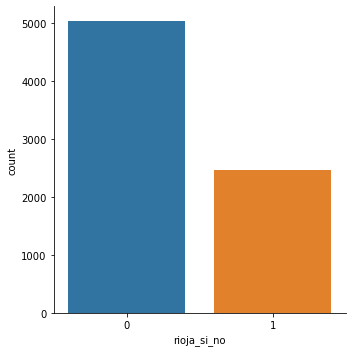

In [63]:
sns.catplot(x= "rioja_si_no", data = vinos_log,kind='count')

In [64]:
x= vinos_log.drop(columns = ['rioja_si_no'])
y = vinos_log['rioja_si_no']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# LR = LinearRegression()
# LR.fit(x_train,y_train)
# y_prediction_train =  LR.predict(x_train)
# Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

# y_prediction =  LR.predict(x_test)
# Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# print('Para el conjunto train:---------------')
# print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
# print('El valor de r2 score adjusted es ',Adj_r2_train)
# print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
# print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))

# print('Para el conjunto test:---------------')
# print('El valor de r2 score es ',r2_score(y_test,y_prediction))
# print('El valor de r2 score adjusted es ',Adj_r2_test)
# print('El MAE es',mean_absolute_error(y_test,y_prediction))
# print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

In [65]:
vinos_log.head(2)

,wine,year,rating,num_reviews,country,region,price,type,body,acidity,rioja_si_no
0,Tinto,2013,4.9,58,Espana,Toro,995.0,Toro Red,5.0,3.0,0
1,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.5,Tempranillo,4.0,2.0,0


In [66]:
# tenemos que codificar la col wine para poder meterla en el modelo logístico o tirarla.

In [ ]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)
# ajustamos el modelo
log_reg.fit(x_train,y_train)
# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train)
# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test)


train_score_lr = accuracy_score(y_train, y_pred_train)
print('Para el conjunto train:---------------')
print('El valor de accuracy  es ',train_score_lr)

print('Para el conjunto test:---------------')
test_score_lr = accuracy_score(y_test, y_pred_test)
print('El valor de accuracy  es ',test_score_lr)